In [59]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Convolution2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.preprocessing.image import ImageDataGenerator
from keras.utils.vis_utils import plot_model
import matplotlib.pyplot as plt
import pydot

PREPROCESSING

In [60]:
# Image Generator for training set
train_datagen = ImageDataGenerator(rescale = 1./255,shear_range = 0.2,zoom_range = 0.2,horizontal_flip = True)

In [61]:
# Image Generator for test set
test_datagen = ImageDataGenerator(rescale = 1./255)

In [62]:
# Preprocessing for Traninig_set
training_set = train_datagen.flow_from_directory('dataset/training_set',target_size=(64,64),batch_size=32,class_mode = 'binary')

Found 6736 images belonging to 3 classes.


In [63]:
# Preprocessing for Test_set
test_set = test_datagen.flow_from_directory('dataset/test_set',target_size = (64,64),batch_size = 32,class_mode = 'binary')

Found 1421 images belonging to 3 classes.


In [64]:
# Training and Test set size
training_set.target_size,test_set.target_size

((64, 64), (64, 64))

In [65]:
# Input shape for Convolutional Layers
conv_input_shape = training_set.target_size + (3,)
conv_input_shape

(64, 64, 3)

In [66]:
# Number of images in both training and test set
train_size = training_set.n
test_size = test_set.n

train_size,test_size

(6736, 1421)

CREATING CLASSIFIER

In [70]:
# Initializing the Convolutional Neural Network
classifier = Sequential()

In [71]:
# Adding First Convolutional Layer
classifier.add(Convolution2D(32, (3, 3), input_shape = conv_input_shape, activation = 'relu'))

In [72]:
# Adding Pooling for Layer1
classifier.add(MaxPooling2D(pool_size = (2, 2)))

In [73]:
# Adding Second Convolutional Layer
classifier.add(Convolution2D(32, (3, 3), activation = 'relu'))

In [74]:
# Adding Pooling for Layer2
classifier.add(MaxPooling2D(pool_size = (2, 2)))

In [75]:
classifier.add(Flatten())

In [76]:
# Adding input and output layers
classifier.add(Dense(units = 128,activation = 'relu'))
classifier.add(Dense(units = 1,activation = 'sigmoid'))

In [77]:
# Selecting optimizer,loss function and calculation metrics
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [78]:
classifier.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 62, 62, 32)        896       
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 29, 29, 32)        9248      
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 6272)              0         
_________________________________________________________________
dense_7 (Dense)              (None, 128)               802944    
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 129       
Total para

TRAIN THE MODEL

In [79]:
history = classifier.fit_generator(training_set,steps_per_epoch = train_size,epochs = 5,validation_data = test_set,validation_steps  = test_size)

Epoch 1/5
6736/6736 [==============================] - 25951s 4s/step - loss: -4.4139 - acc: 0.5725 - val_loss: -5.0161 - val_acc: 0.5707
Epoch 2/5
6736/6736 [==============================] - 2147s 319ms/step - loss: -5.1017 - acc: 0.6298 - val_loss: -5.0090 - val_acc: 0.5879
Epoch 3/5
6736/6736 [==============================] - 2113s 314ms/step - loss: -5.2502 - acc: 0.6441 - val_loss: -4.9968 - val_acc: 0.6088
Epoch 4/5
6736/6736 [==============================] - 2120s 315ms/step - loss: -5.2903 - acc: 0.6505 - val_loss: -4.6145 - val_acc: 0.6071
Epoch 5/5
6736/6736 [==============================] - 2127s 316ms/step - loss: -5.3099 - acc: 0.6535 - val_loss: -4.9650 - val_acc: 0.6073


RESULT OF CNN

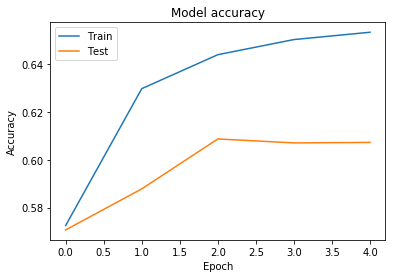

In [92]:
# Plot training & validation accuracy values
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.savefig('modelacc')
plt.show()

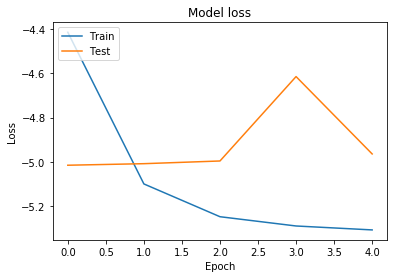

In [91]:
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.savefig('modelloss')
plt.show()